# Reference
- https://github.com/pymc-devs/pymc
- https://github.com/pyro-ppl/numpyro
- https://github.com/dfm/emcee
- https://github.com/wiseodd/MCMC
- https://github.com/wiseodd/probabilistic-models
- https://github.com/choderalab/openmmtools

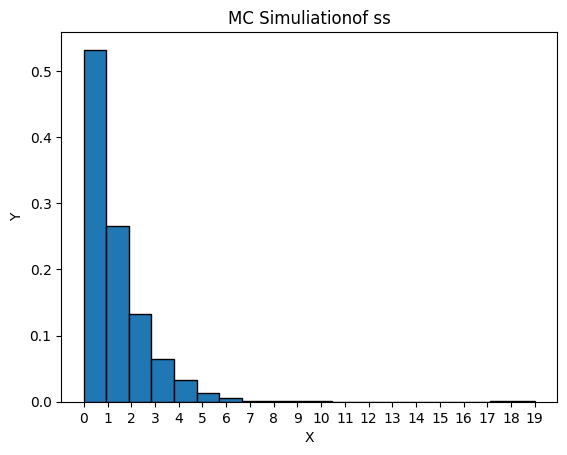

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# reference: - https://github.com/pymc-devs/pymc
def mc_simluation(N, state_space):
    current_state = np.random.choice(state_space)
    states = [current_state]
    
    for _ in range(N - 1):
        if current_state == 19:
            next_state = 0
        else:
            if np.random.rand() < 0.5:
                next_state = (current_state + 1) % 20
            else:
                next_state = 0
        states.append(next_state)
        current_state = next_state
    
    return states

N = 3000
ss = np.arange(20)

samples = mc_simluation(N, ss)

# - https://github.com/pymc-devs/pymc
plt.hist(samples, bins=20, edgecolor='k', density=True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MC Simuliationof ss')
plt.xticks(ss)
plt.show()


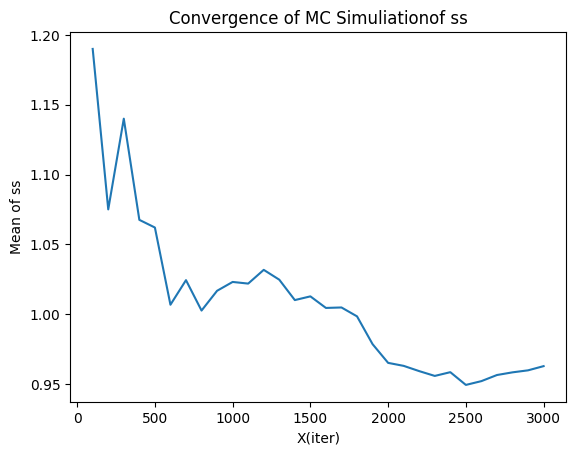

In [10]:
# - https://github.com/pymc-devs/pymc
iterations = np.arange(100, N+1, 100)
means = [np.mean(samples[:i]) for i in iterations]

plt.plot(iterations, means)
plt.xlabel('X(iter)')
plt.ylabel('Mean of ss')
plt.title('Convergence of MC Simuliationof ss')
plt.show()

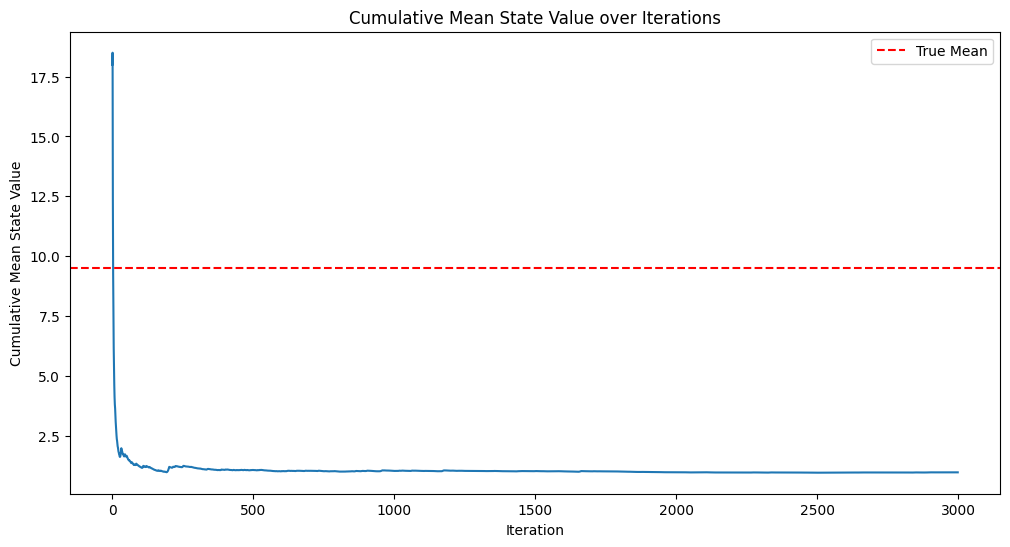

In [11]:
# - https://github.com/pymc-devs/pymc
mean_values = np.cumsum(samples) / np.arange(1, N+1)

plt.figure(figsize=(12, 6))
plt.plot(mean_values)
plt.xlabel('Iteration')
plt.ylabel('Cumulative Mean State Value')
plt.title('Cumulative Mean State Value over Iterations')
plt.axhline(y=np.mean(ss), color='r', linestyle='--', label='True Mean')
plt.legend()
plt.show()